In [1]:
import numpy as np
import pandas as pd
import bilby
import os
import bilby.gw.result as bilby_result
import ast
import matplotlib.pyplot as plt


plt.rcParams.update({

    # --- Figure Layout ---
    "figure.figsize": (6, 4),           # Default figure size in inches
    "figure.dpi": 150,                  # DPI for crisp rendering
    "savefig.dpi": 300,                 # Higher DPI for saved figures
    "figure.autolayout": True,          # Avoids label overlap

    # --- Font & Text ---
    "font.family": "monospace",             # Or "sans-serif" for modern look
    "font.serif": ["Terminal"],  # Matches many journals
    "font.size": 10,                    # Base font size
    "axes.titlesize": 14,               # Title font size
    "axes.labelsize": 13,               # Axis label size
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
    "mathtext.fontset": "dejavuserif",  # Matches the serif font

    # --- Line & Marker Styles ---
    "lines.linewidth": 1.8,
    "lines.markersize": 6,
    "lines.markeredgewidth": 0.7,

    # --- Axes ---
    "axes.linewidth": 1.0,              # Frame thickness
    "axes.labelpad": 6,                 # Padding between label and axis
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "grid.linewidth": 0.7,
    "axes.spines.top": False,           # Removes top spine
    "axes.spines.right": False,         # Removes right spine

    # --- Ticks ---
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "xtick.top": False,
    "ytick.right": False,

    # --- Legend ---
    "legend.frameon": False,
    "legend.handlelength": 2,
    "legend.handletextpad": 0.4,
    "legend.loc": "best",

    # --- Colors and Colormaps ---
    "image.cmap": "viridis",            # Good perceptually uniform default
    "axes.prop_cycle": plt.cycler("color", [
        "#1f77b4", "#ff7f0e", "#2ca02c",
        "#d62728", "#9467bd", "#8c564b",
        "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"
    ]),
})

In [2]:
def getMeaningfulColumns(differenceDF):
    cols=[]
    for col in differenceDF:
        if differenceDF[col].isna().all():
            continue
        else:
            cols.append(col)
    return cols

def makePostInjDiffPlot(columns,differenceDF,event=False):
    nrows = int(np.ceil((len(columns))/5))
    fig,axs = plt.subplots(nrows,5,figsize=[10,2*nrows])
    if type(event)==str:
        fig.suptitle(f"{event} posterior samples - Injection value for ensemble")
    else:
        fig.suptitle(f"Posterior samples - Injection for different parameters of event\n{event.label}")
    for col,ax in zip(columns,axs.flatten()):
        ax.hist(differenceDF[col],histtype='step')
        # ax.grid()
        ax.set_xlabel(col)
        # if not (type(event)==str):
        ax.axvline(0,0,ax.get_ylim()[1],color='red')
    for ax in axs[:,0]:
        ax.set_ylabel("Counts / bin")
    fig.tight_layout(pad=2)
    return fig,axs

def getResult(path,injectionDir="injectionFiles",injectionSuffix="_injection.dat"):
    """
    A function to read a path where the bilby_pipe run
    is stored, and return a complete CBCResult object
    """

    parentPath = "/".join(path.split("/")[:-1])
    label = path.split("/")[-1] # The label, taking the form UniformParent,uWeight_aligned_BBH_5
    # Return the final result
    return bilby_result.CBCResult.from_hdf5(os.path.join(parentPath,label,"final_result",
                                                              label+"_data0_0_analysis_H1L1V1_result.hdf5"))

In [3]:
BilbyCatalogPath = "/pscratch/sd/s/seanmacb/proj411ProdRuns/catalogs/"

In [4]:
msk = [x.lower().startswith("uniform") for x in os.listdir(BilbyCatalogPath)]
catalogs_Uniform = np.array(os.listdir(BilbyCatalogPath))[np.array(msk)]
uPathTesting = [os.path.join(BilbyCatalogPath,catalogs_Uniform[-2])] # This has been sub-indexed to only the u directory

In [5]:
for minimalPath in uPathTesting: # Change this line to catalogs_uniform when ready to check all dirs
    allEvents = []
    eventDirectories = os.listdir(minimalPath)
    for event in list(eventDirectories):
        try:
            allEvents.append(getResult(os.path.join(minimalPath,event)))
        except:
            print(f"Could not open {event}")
            continue

Could not open UniformParent,uWeight_aligned_BBH_74
Could not open UniformParent,uWeight_aligned_BBH_142
Could not open UniformParent,uWeight_aligned_BBH_59
Could not open UniformParent,uWeight_aligned_BBH_53
Could not open UniformParent,uWeight_aligned_BBH_5
Could not open UniformParent,uWeight_aligned_BBH_116
Could not open UniformParent,uWeight_precessing_BBH_12
Could not open UniformParent,uWeight_precessing_BBH_67
Could not open UniformParent,uWeight_precessing_BBH_24
Could not open UniformParent,uWeight_precessing_BBH_117


15:58 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
15:58 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open UniformParent,uWeight_aligned_BBH_79
Could not open UniformParent,uWeight_aligned_BBH_134
Could not open UniformParent,uWeight_precessing_BBH_6
Could not open testRun.sh
Could not open UniformParent,uWeight_aligned_BBH_29
Could not open UniformParent,uWeight_precessing_BBH_126
Could not open UniformParent,uWeight_precessing_BBH_118
Could not open UniformParent,uWeight_aligned_BBH_165
Could not open UniformParent,uWeight_aligned_BBH_62
Could not open UniformParent,uWeight_precessing_BBH_133
Could not open UniformParent,uWeight_precessing_BBH_3
Could not open iniFiles
Could not open UniformParent,uWeight_aligned_BBH_143
Could not open checkBigJobStatus.sh


15:58 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data
15:58 bilby INFO    : Global meta data was removed from the result object for compatibility. Use the `BILBY_INCLUDE_GLOBAL_METADATA` environment variable to include it. This behaviour will be removed in a future release. For more details see: https://bilby-dev.github.io/bilby/faq.html#global-meta-data


Could not open injectionFiles
Could not open UniformParent,uWeight_aligned_BBH_82
Could not open testRun.txt
Could not open UniformParent,uWeight_precessing_BBH_37
Could not open UniformParent,uWeight_aligned_BBH_80
Could not open UniformParent,uWeight_precessing_BBH_74


/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/construction.py:817: ComplexWarning: Casting complex values to real discards the imaginary part
  subarr = np.asarray(arr, dtype=dtype)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/construction.py:817: ComplexWarning: Casting complex values to real discards the imaginary part
  subarr = np.asarray(arr, dtype=dtype)
/opt/desc/py/lib/python3.12/site-packages/pandas/core/dtypes/astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/opt/desc/py/lib/python3.12/site-packages/pandas/core

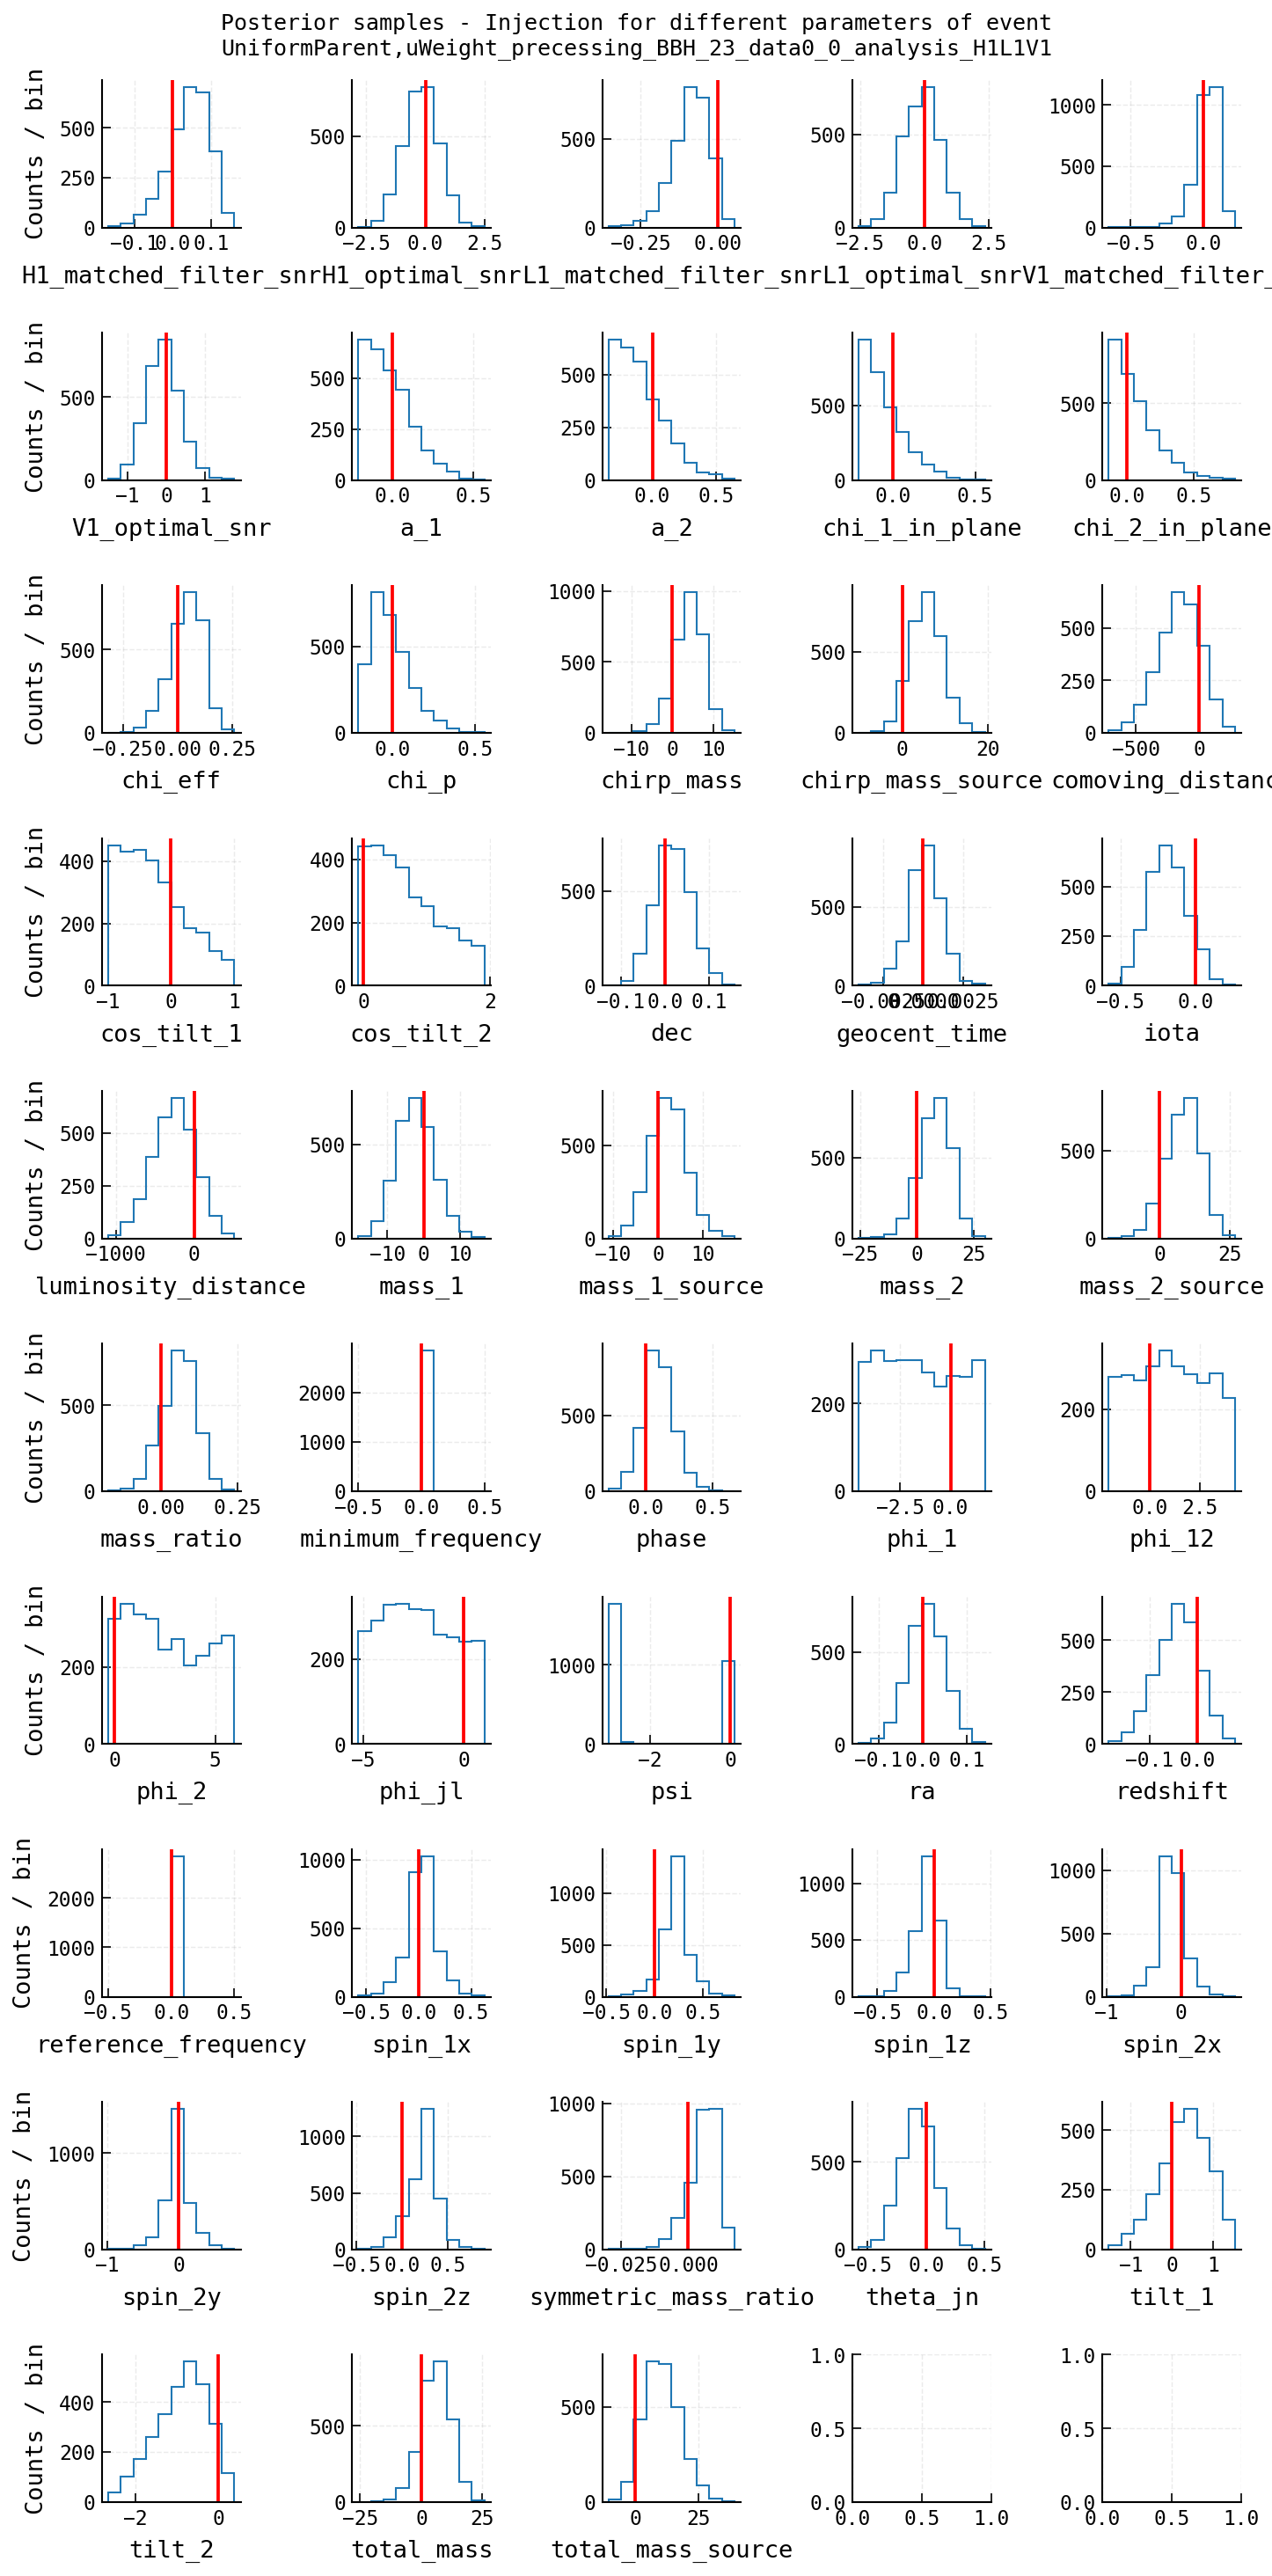

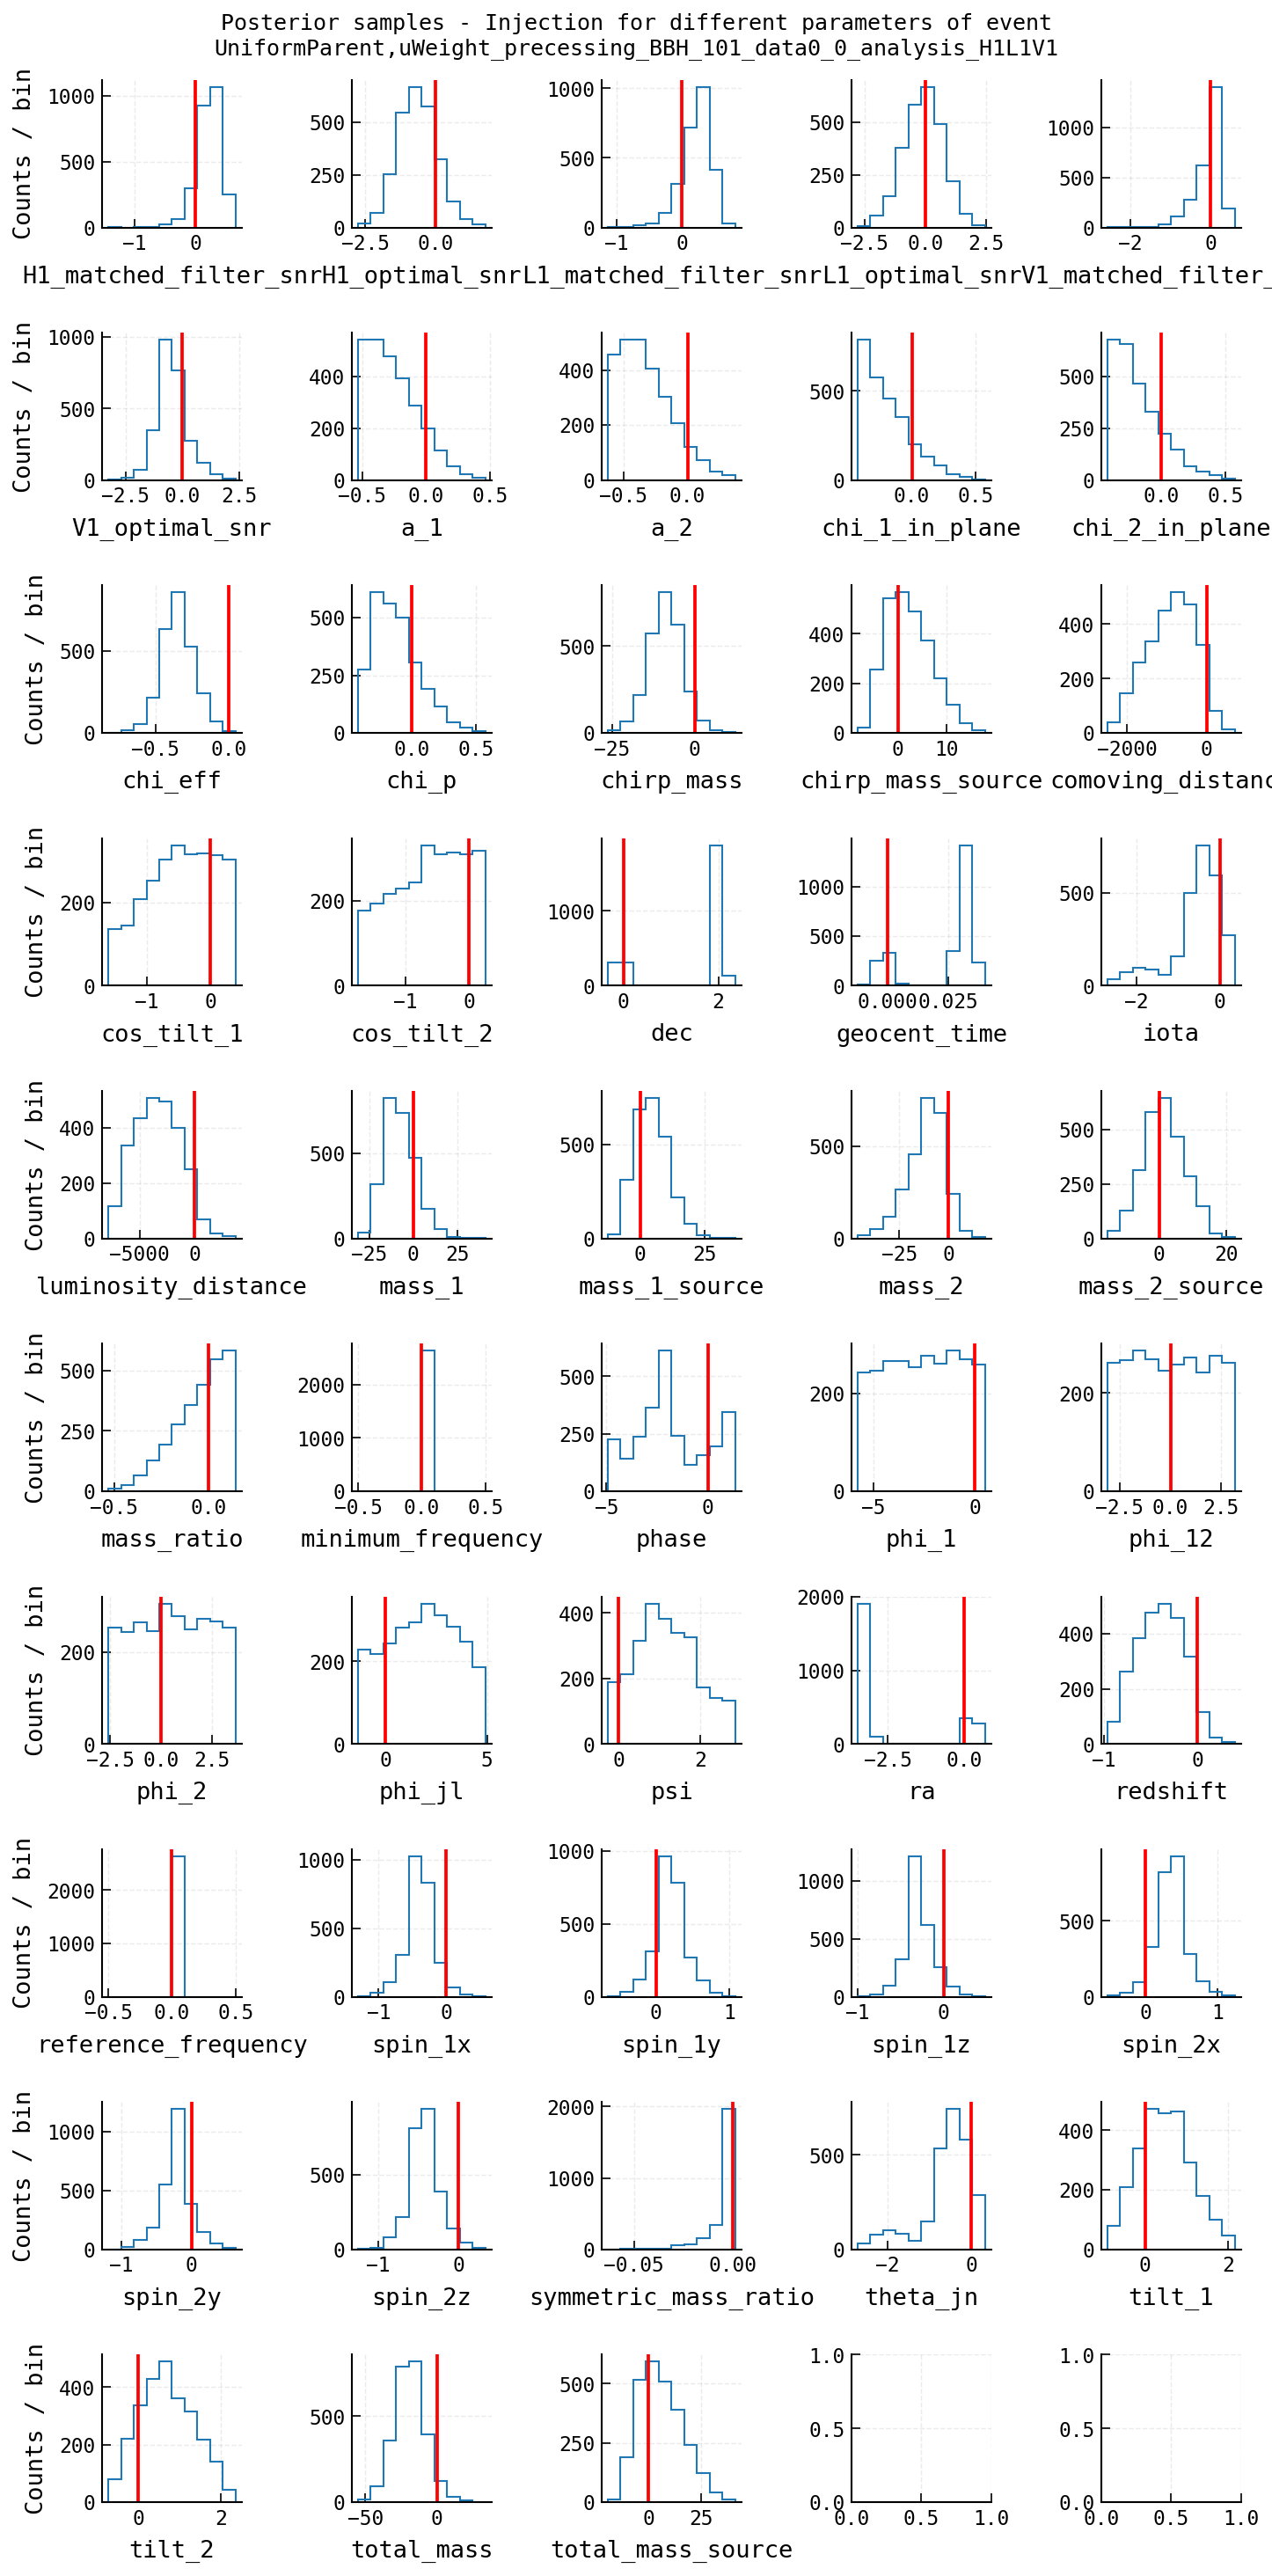

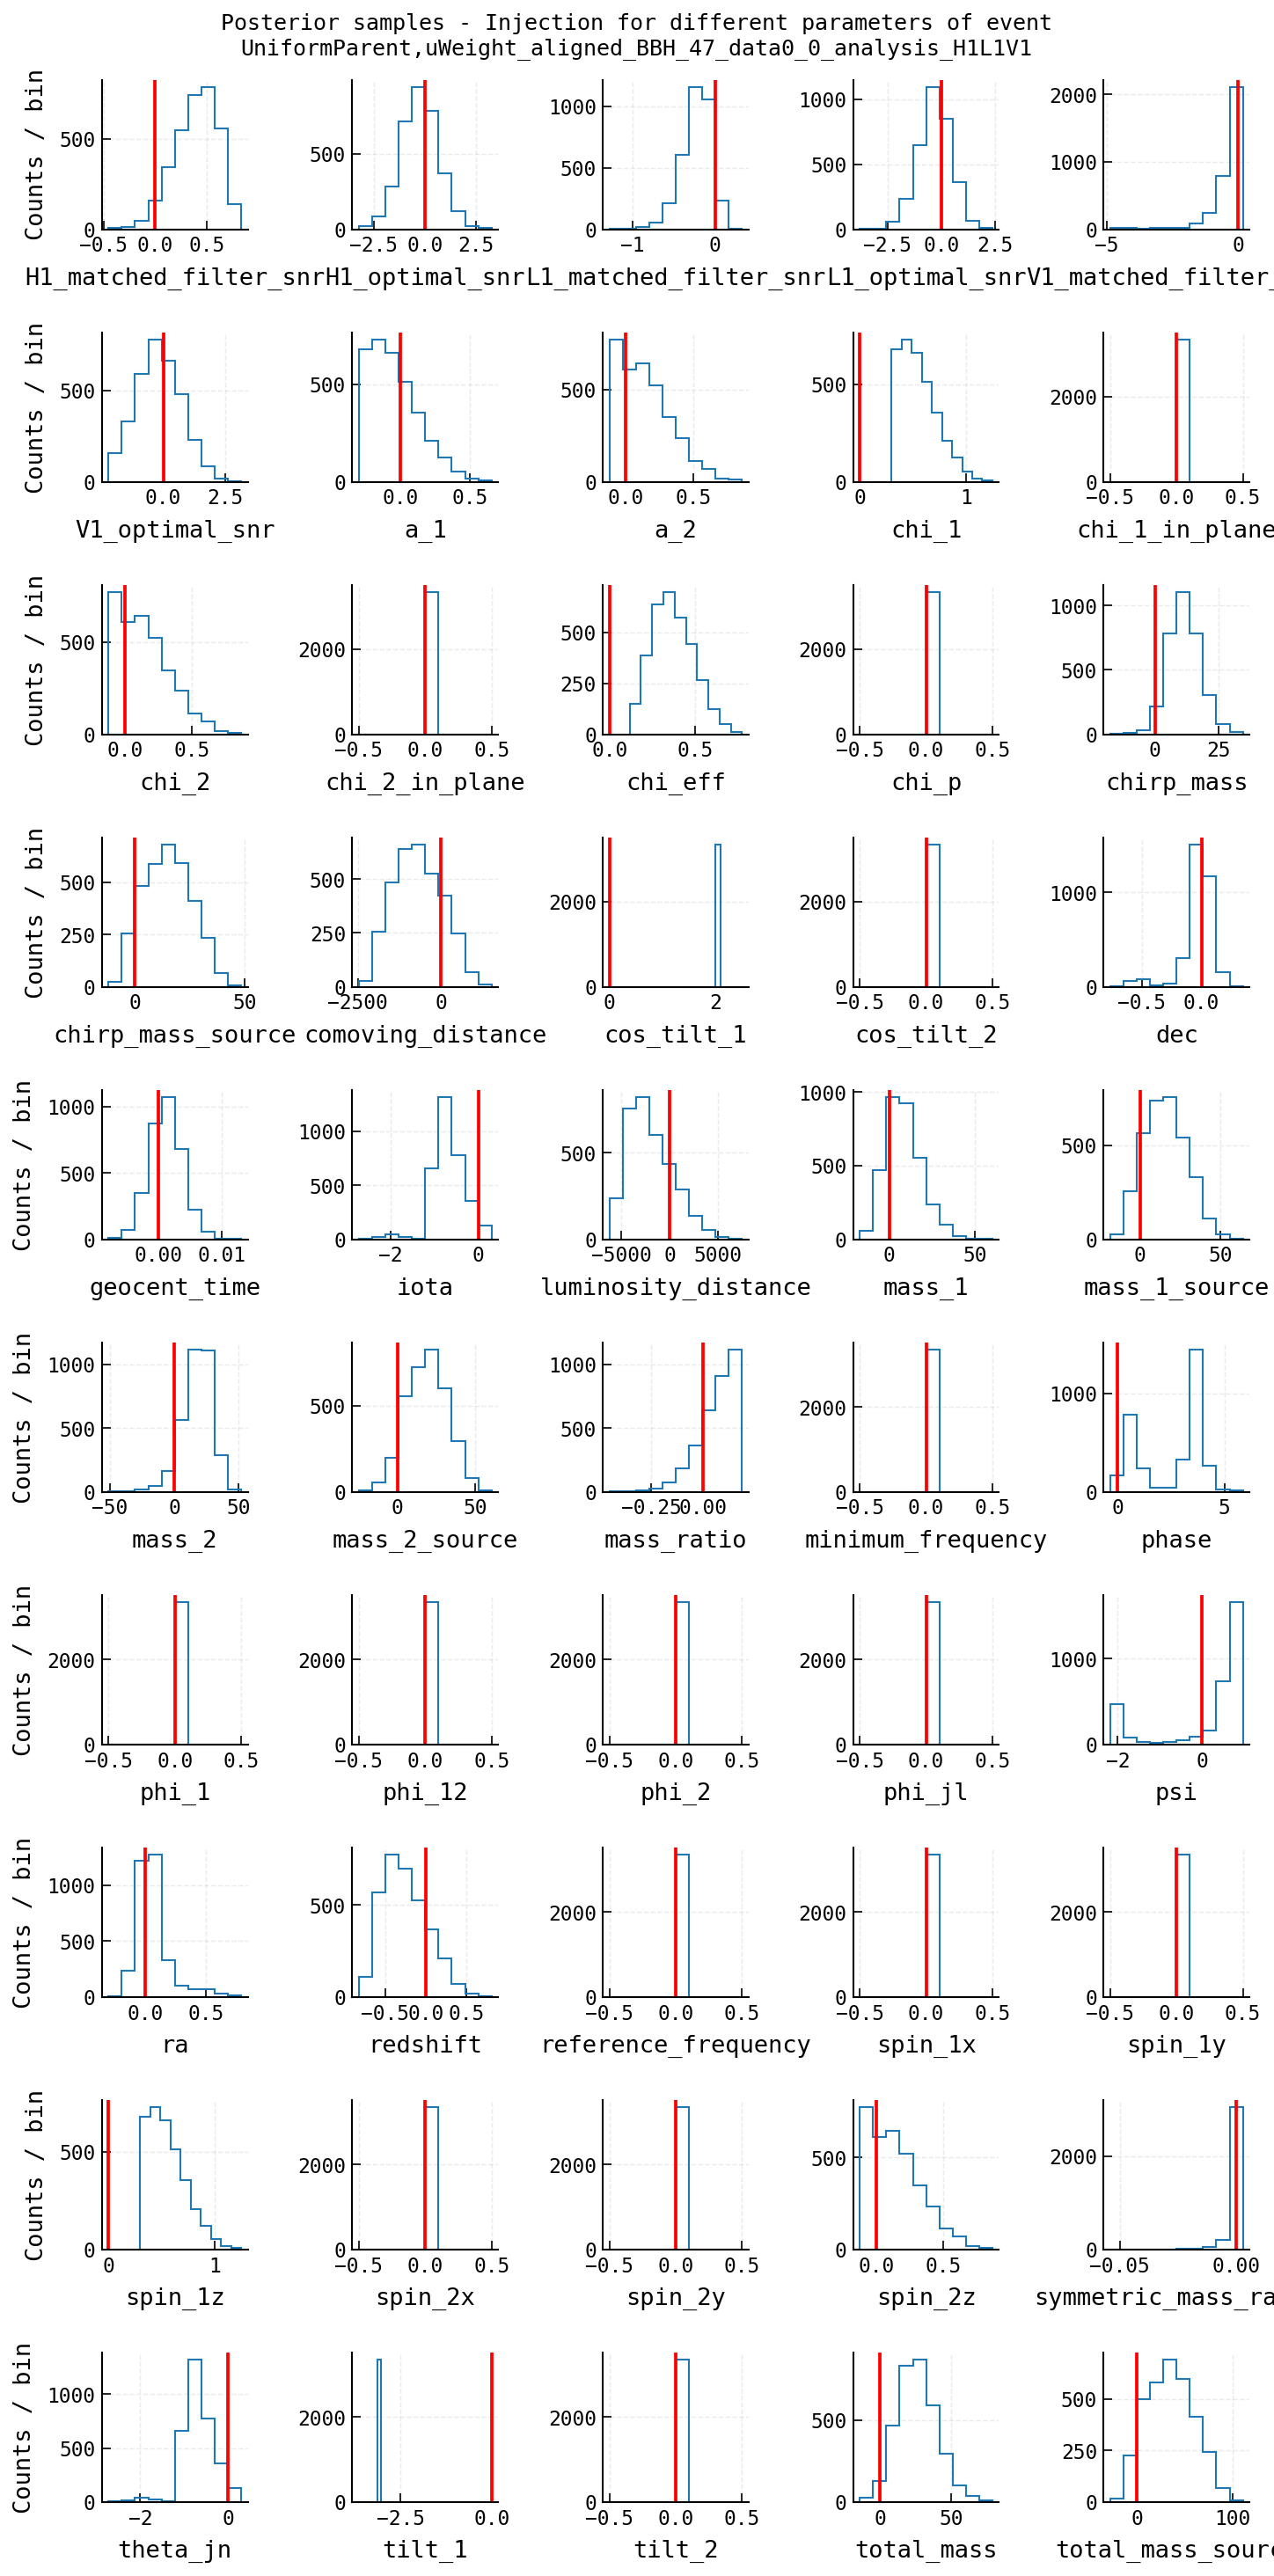

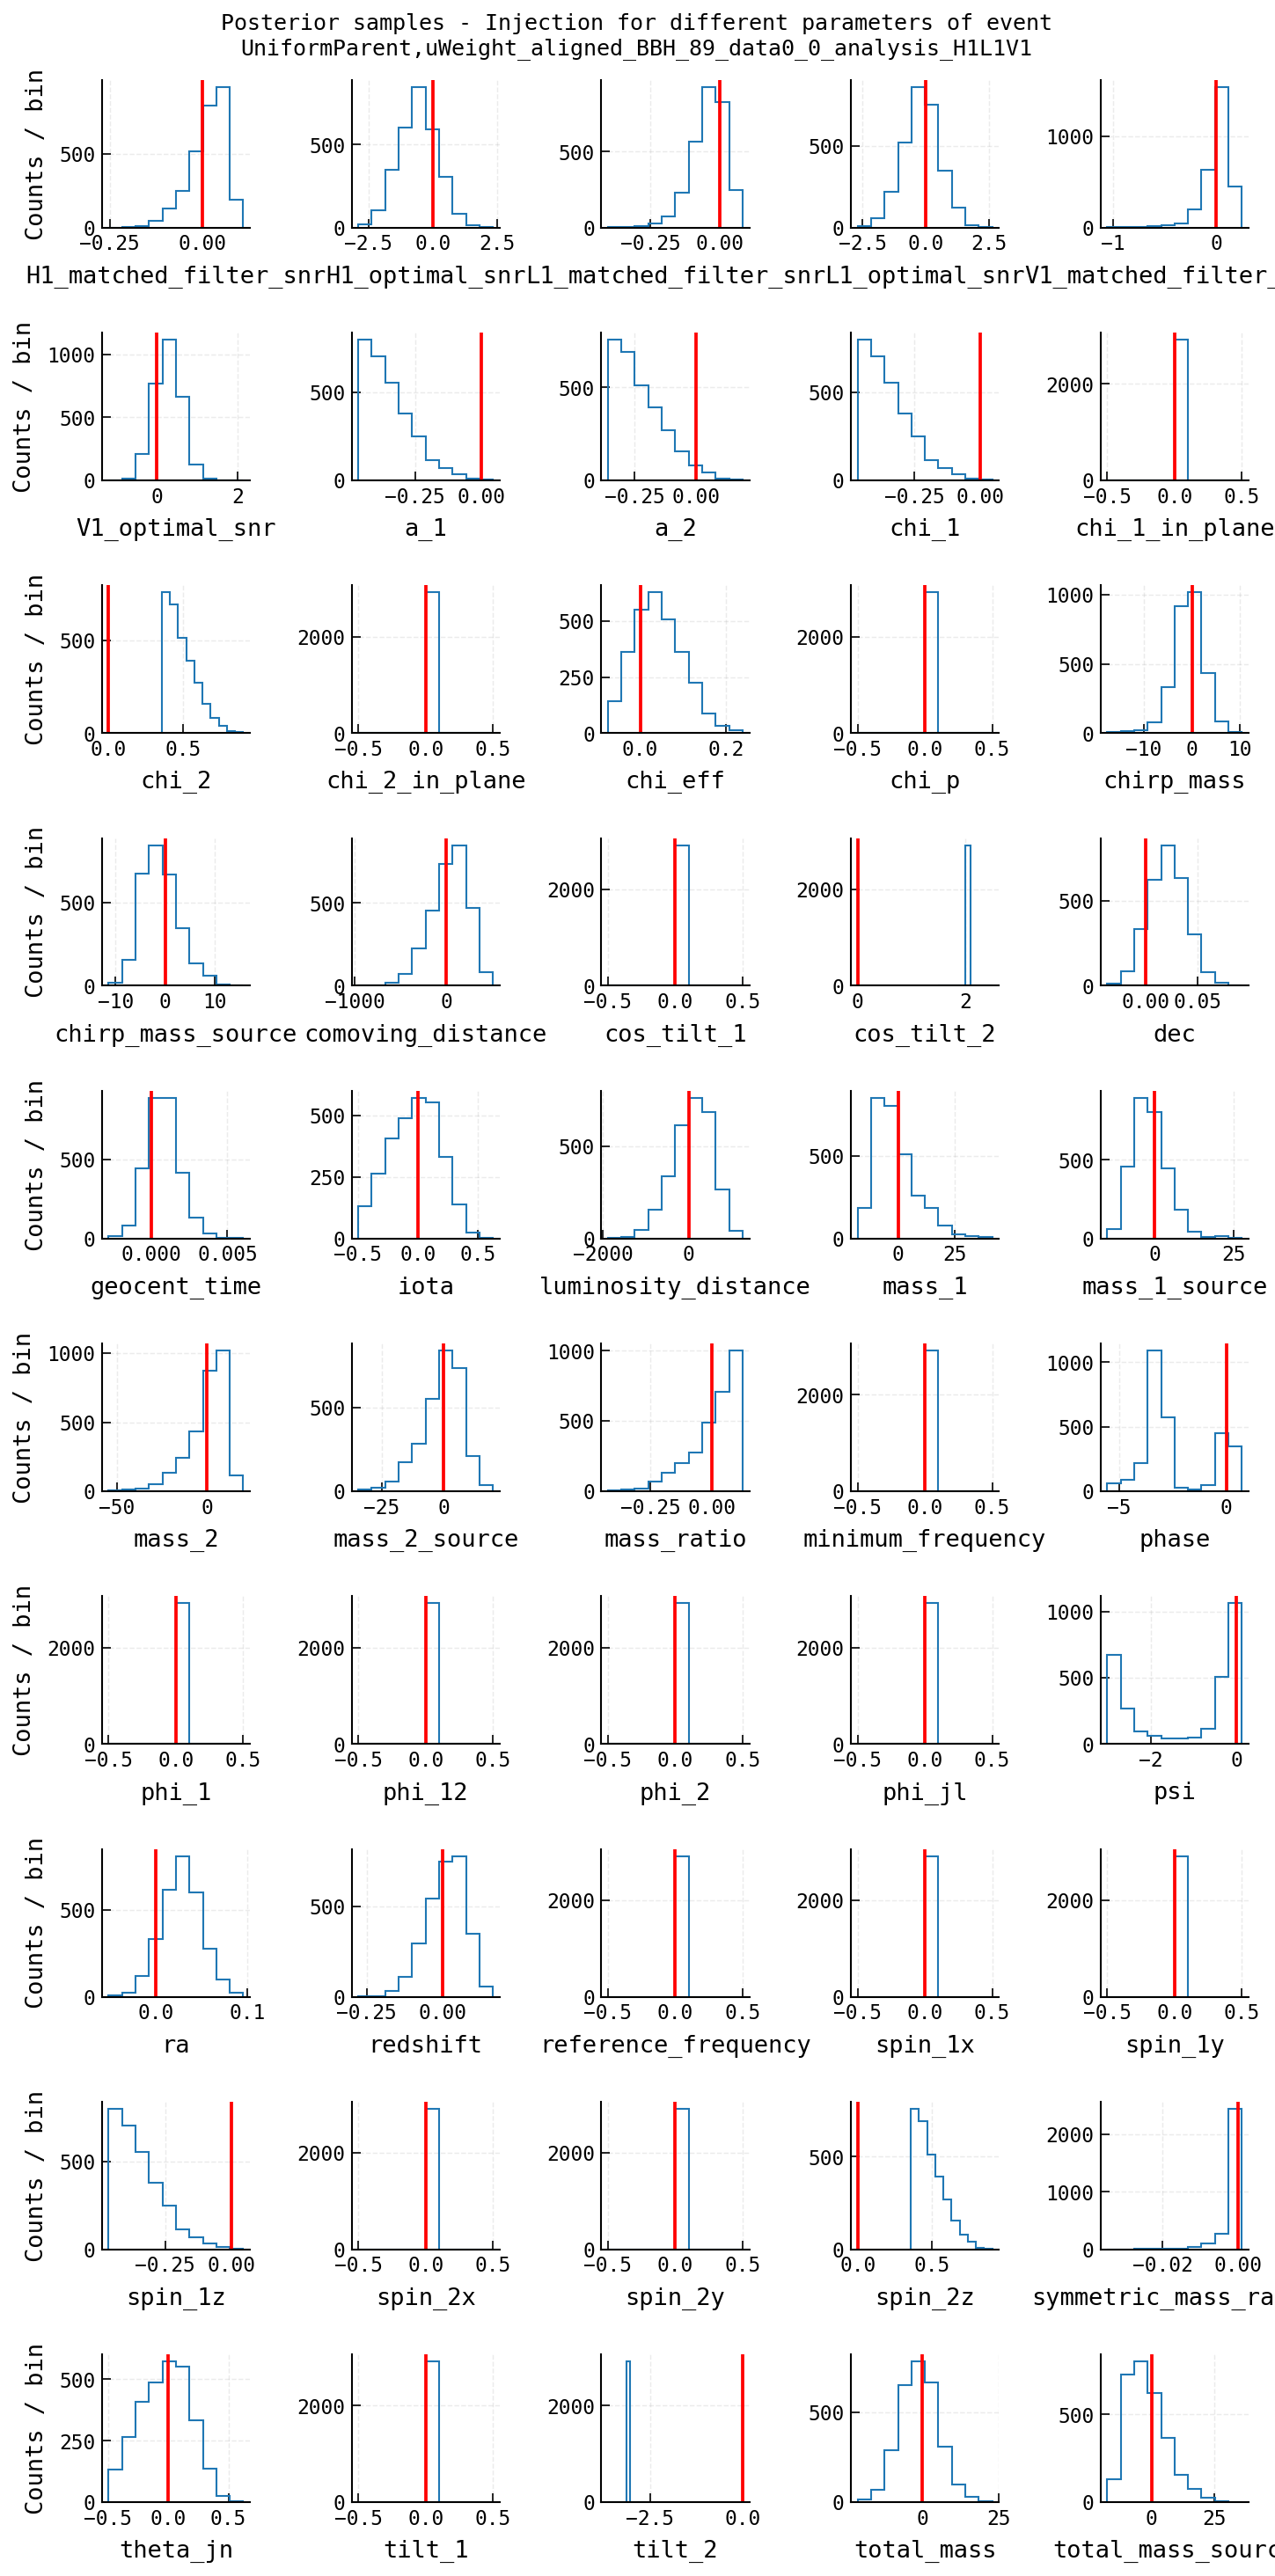

In [6]:
postMeansDiff = []
postMediansDiff = []

for event in allEvents:
    try:
        event.posterior.drop("waveform_approximant",axis=1,inplace=True)
    except:
        pass
    try:
        event.injection_parameters.pop("waveform_approximant")
    except:
        pass
    posteriorResults = event.posterior.astype(np.float64) # Posterior results for one event
    posteriorMean,posteriorMedian = posteriorResults.mean(),posteriorResults.median()
    injectionParams = pd.Series(event.injection_parameters,dtype=np.float64)
    diffDF = posteriorResults-injectionParams
    meaningfulCols = getMeaningfulColumns(diffDF)
    postMeansDiff.append(posteriorMean - injectionParams)
    postMediansDiff.append(posteriorMedian - injectionParams)
    fig,axs = makePostInjDiffPlot(meaningfulCols,diffDF,event)

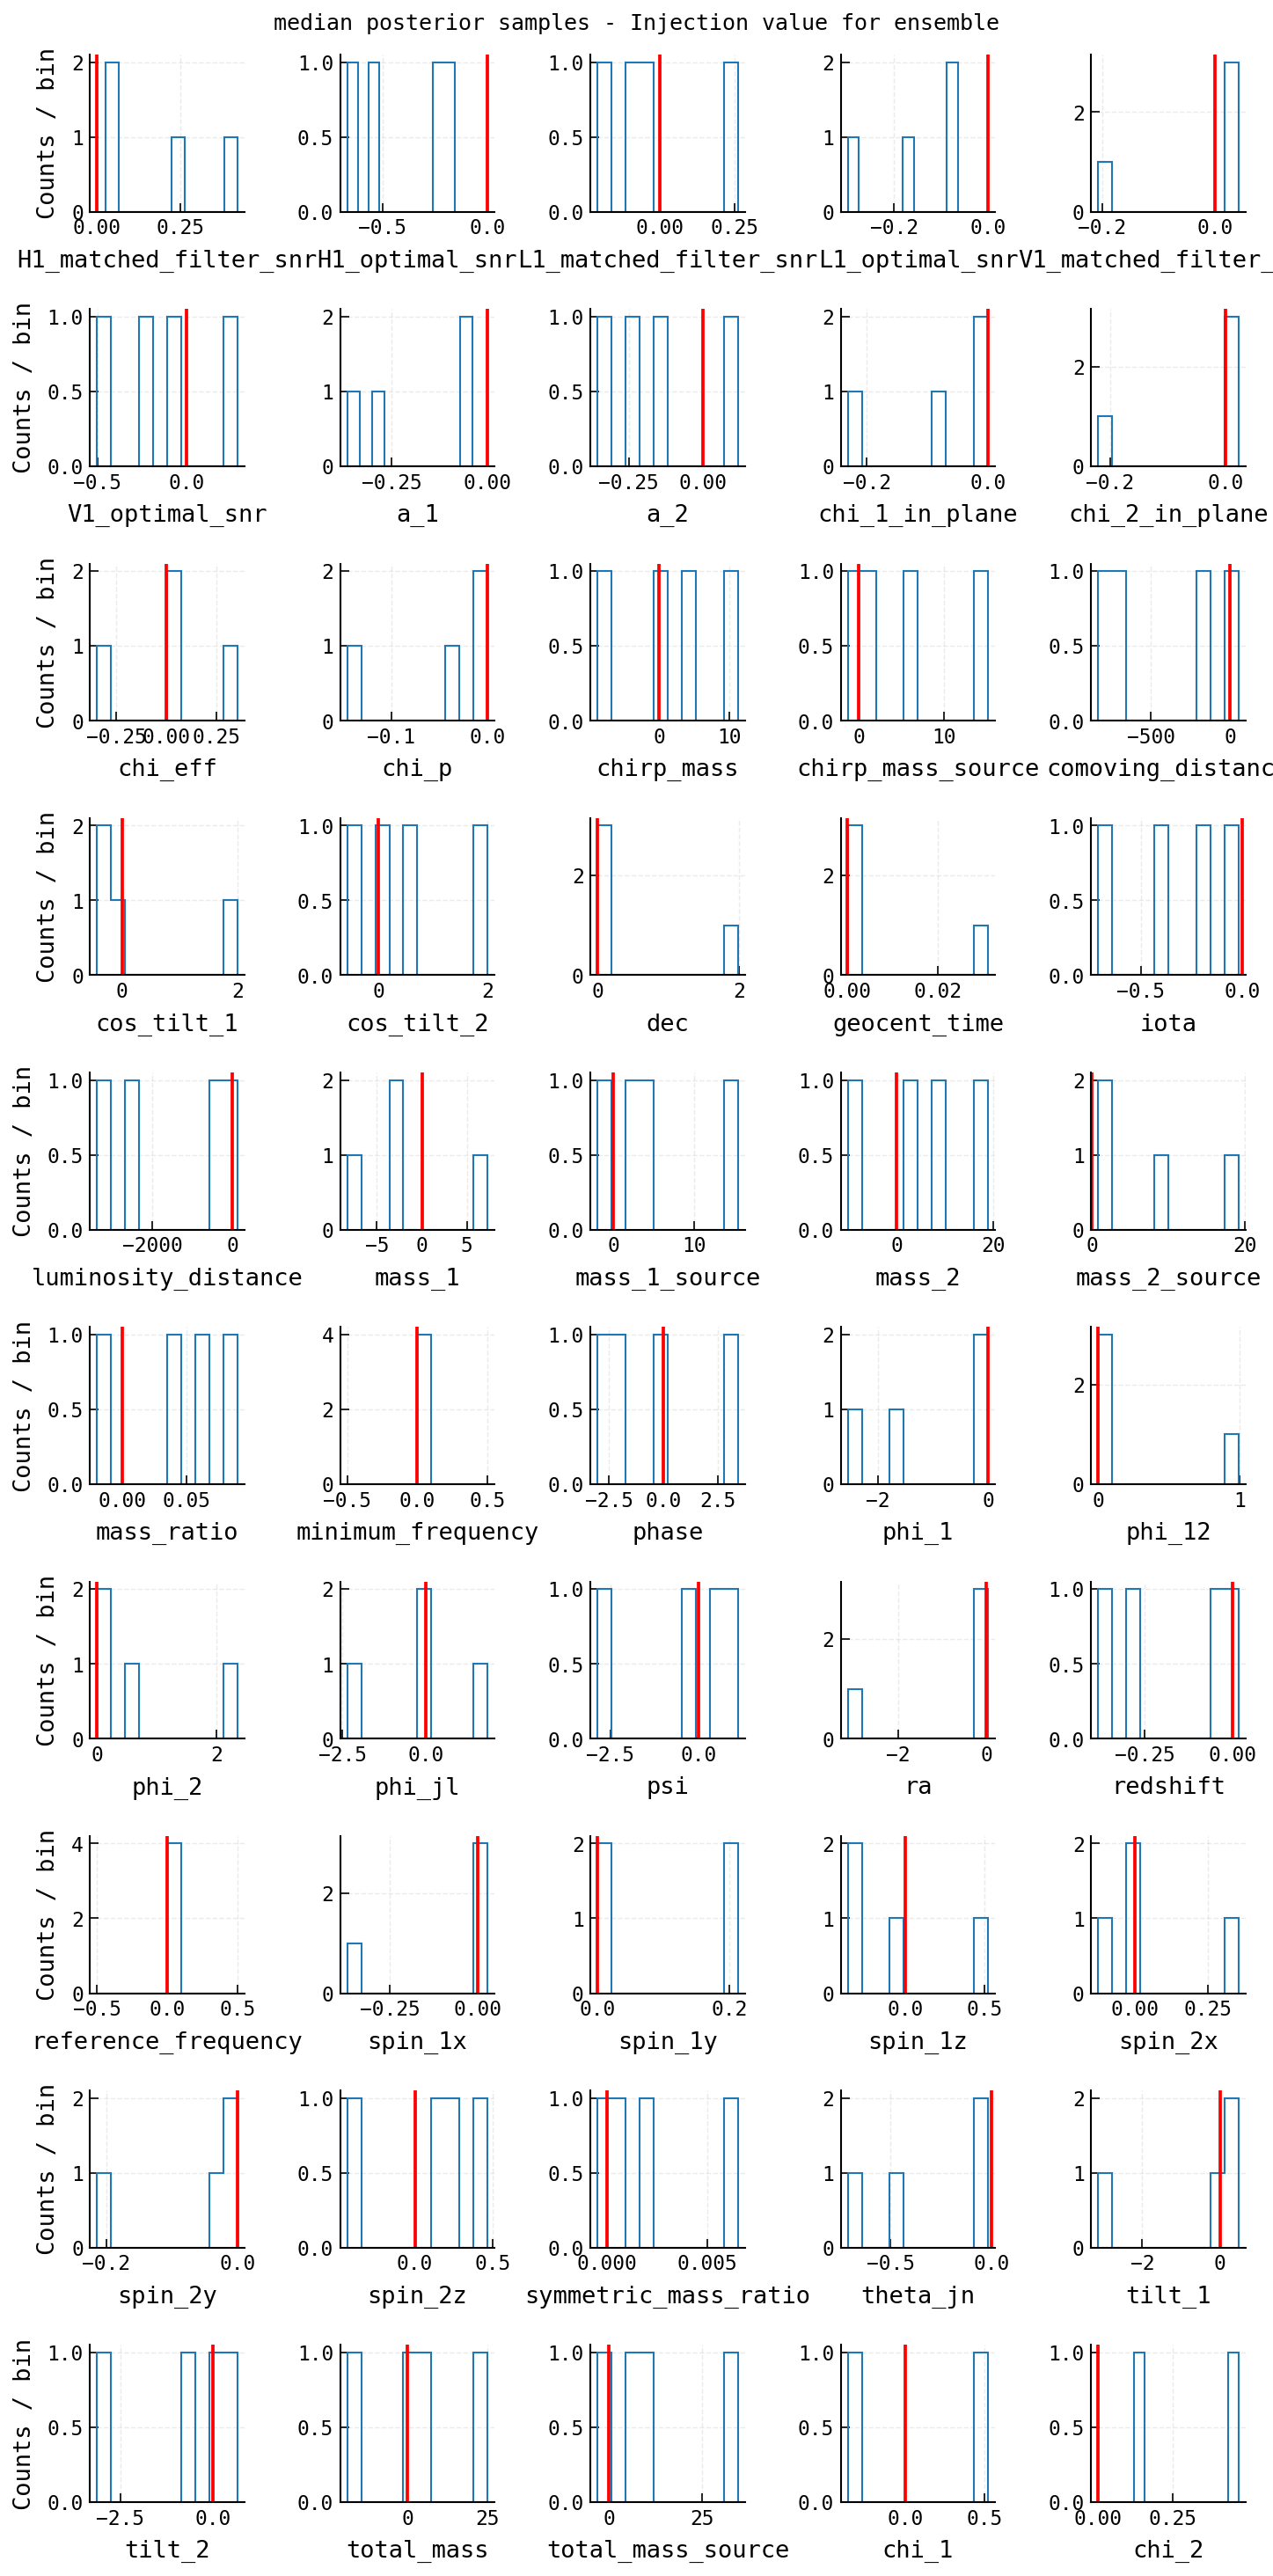

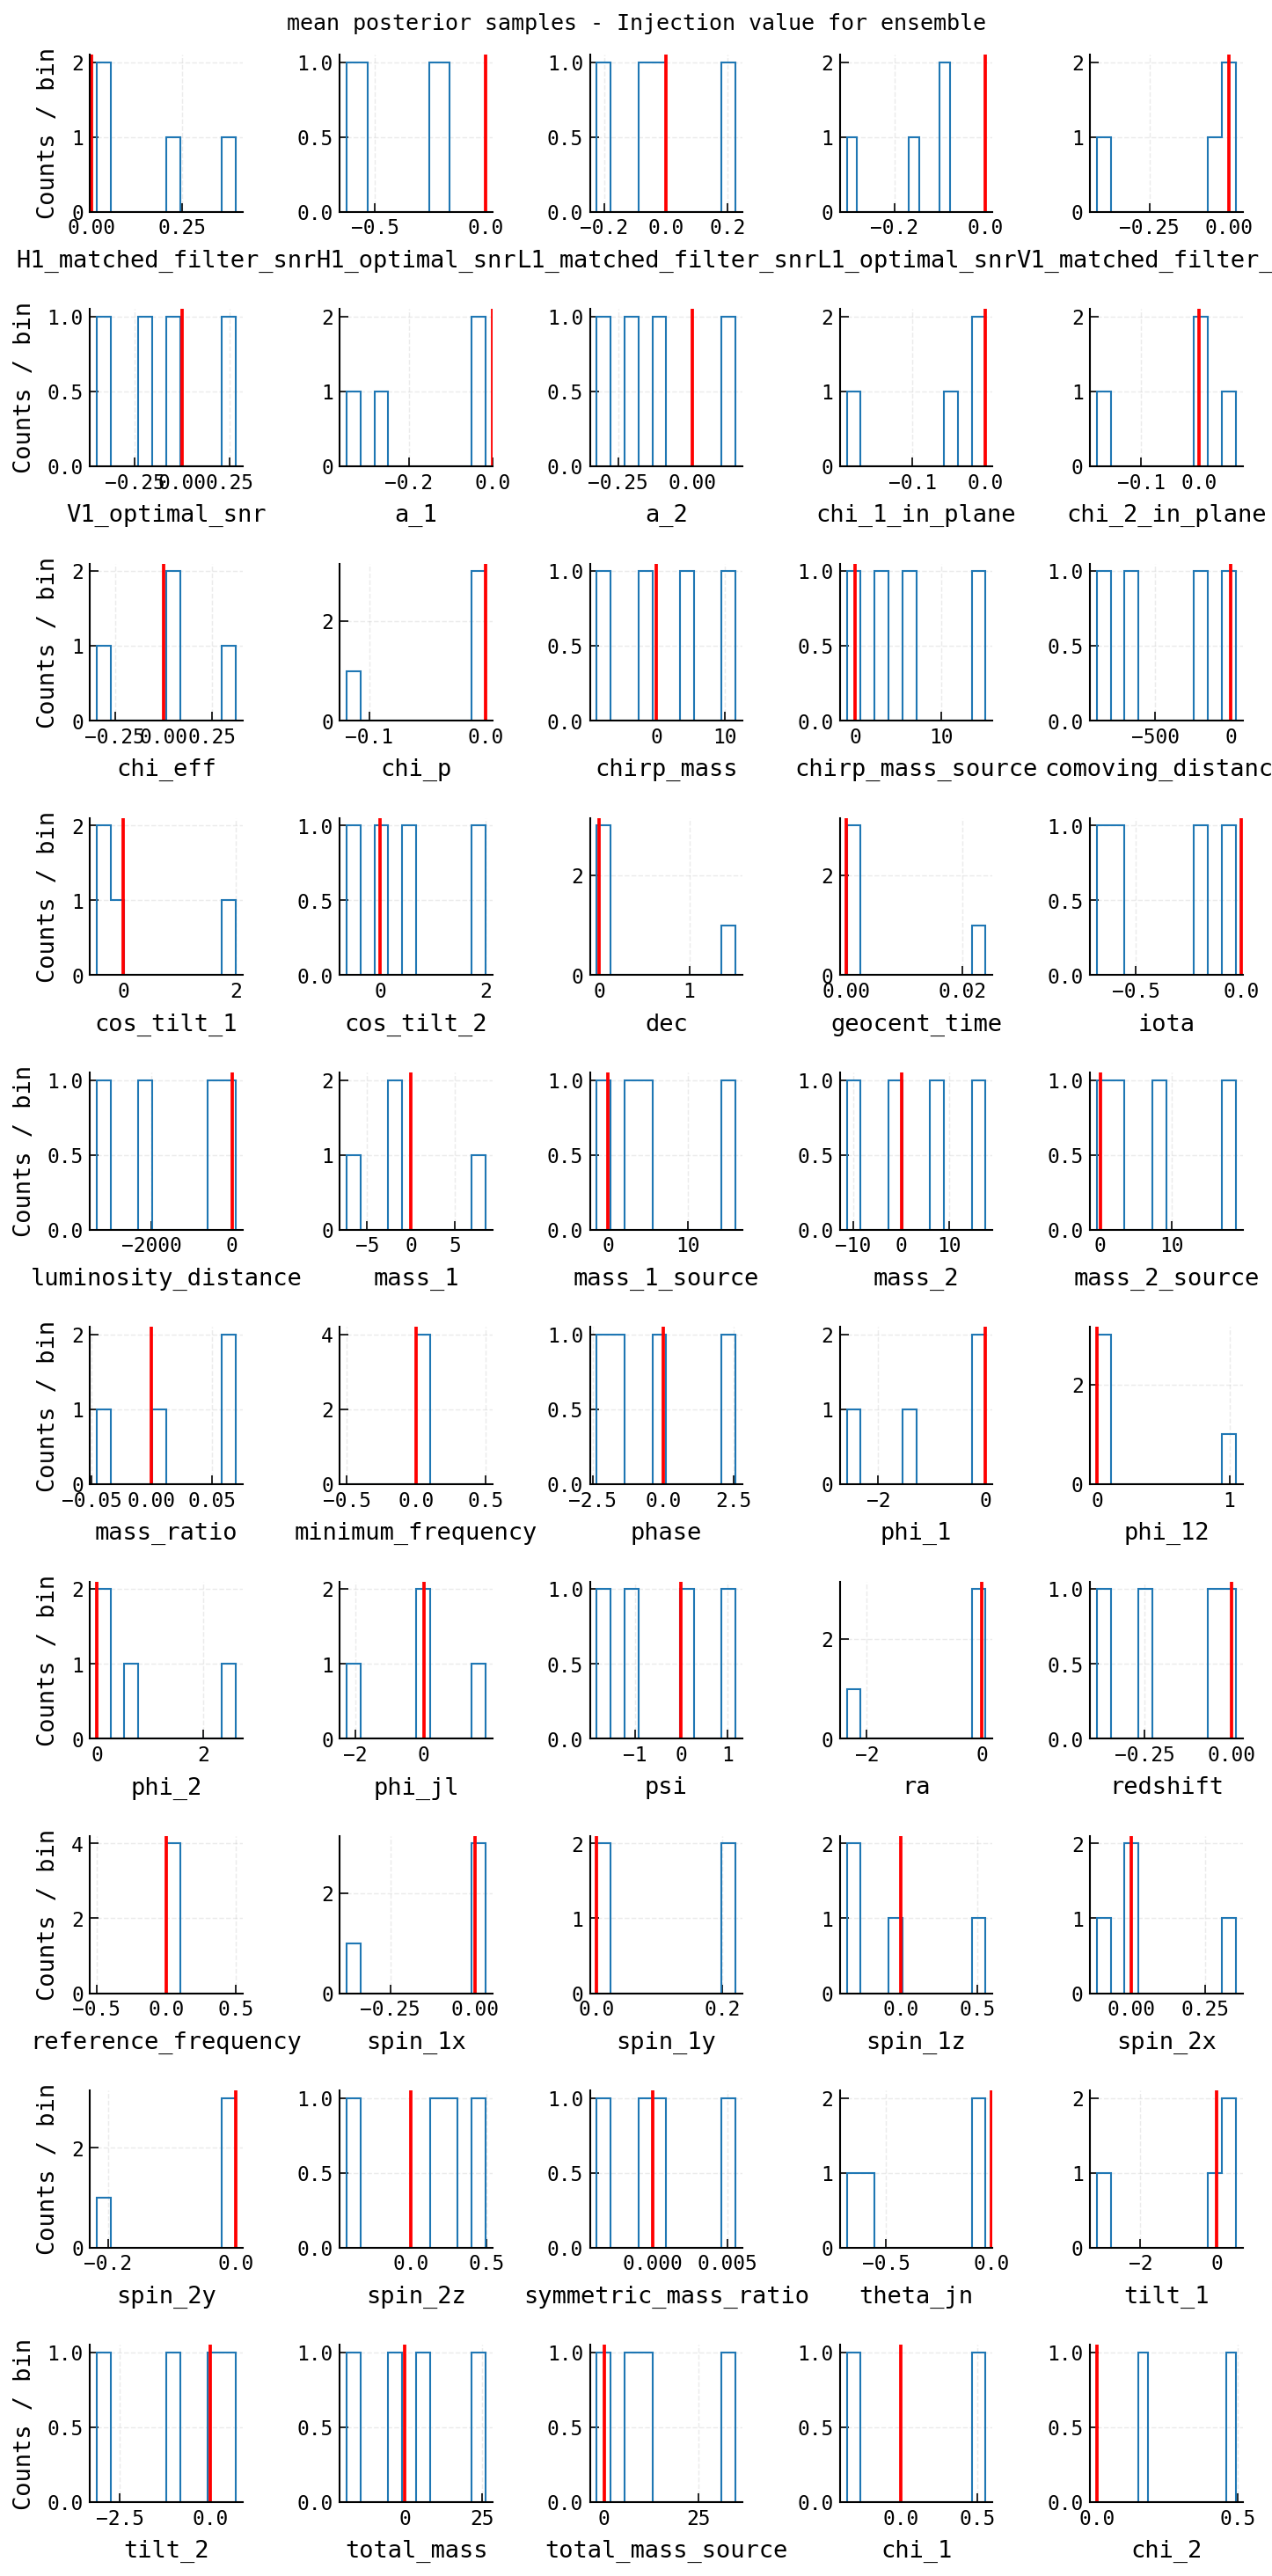

In [7]:
postMeanDiffDF = pd.DataFrame(postMeansDiff)
postMedianDiffDF = pd.DataFrame(postMediansDiff)
for df,meas in zip([postMedianDiffDF,postMeanDiffDF],["median","mean"]):
    myCols = getMeaningfulColumns(df)
    fig,axs = makePostInjDiffPlot(myCols,df,meas)